# Análisis de datos por países

Pretendemos estudiar ahora comparativamente los datos que han ido arrojando los distintos países y hacer una comparativa de sus curvas de contagios y fallecimientos.

Para ello haremos uso de un dataset encontrado en:
    
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

Cargamos librerías y el archivo, sacamos unos cuantos datos para ver la forma de lo que contiene y hacemos algunas pequeñas modificaciones:

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,8)

In [3]:
ruta = '../Datos/Coronavirus_data'
sep = ','

date_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

datos = pd.read_csv(ruta, sep = sep, index_col = 'dateRep', parse_dates = ['dateRep'], date_parser = date_parser)

print(datos.describe())
print(datos.columns)
datos.head()

                day         month          year         cases        deaths  \
count  13418.000000  13418.000000  13418.000000  13418.000000  13418.000000   
mean      16.257266      3.000969   2019.995007    217.345208     15.346773   
std        8.545072      1.256569      0.070489   1551.717979    119.552375   
min        1.000000      1.000000   2019.000000  -1430.000000      0.000000   
25%        9.000000      2.000000   2020.000000      0.000000      0.000000   
50%       17.000000      3.000000   2020.000000      1.000000      0.000000   
75%       24.000000      4.000000   2020.000000     27.000000      0.000000   
max       31.000000     12.000000   2020.000000  48529.000000   4928.000000   

        popData2018  
count  1.329700e+04  
mean   5.626958e+07  
std    1.858449e+08  
min    1.000000e+03  
25%    2.789533e+06  
50%    9.942334e+06  
75%    3.717239e+07  
max    1.392730e+09  
Index(['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories',
       'geoId

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2020-04-27,27,4,2020,68,21,Afghanistan,AF,AFG,37172386.0,Asia
2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
datos.rename({'countriesAndTerritories':'countries'}, axis = 1, inplace = True)

In [5]:
len(datos['countries'].unique())

207

In [6]:
datos.sort_values(by = ['countries', 'dateRep'], ascending = [True, True], inplace = True)

Examinamos la serie para España:

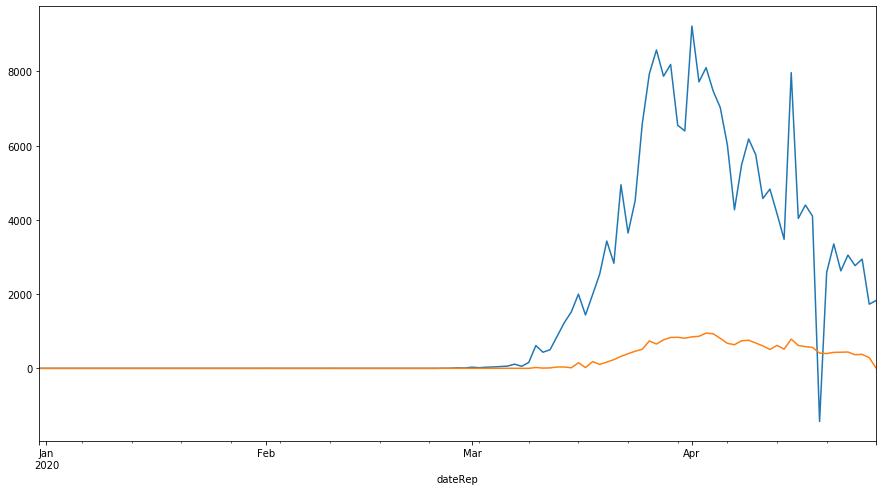

In [7]:
datos.loc[datos['countries'] == 'Spain', 'cases'].plot()
datos.loc[datos['countries'] == 'Spain', 'deaths'].plot()

Examinamos la serie para China, donde podemos ver la aparición de un extraño pico en la serie de contagios:

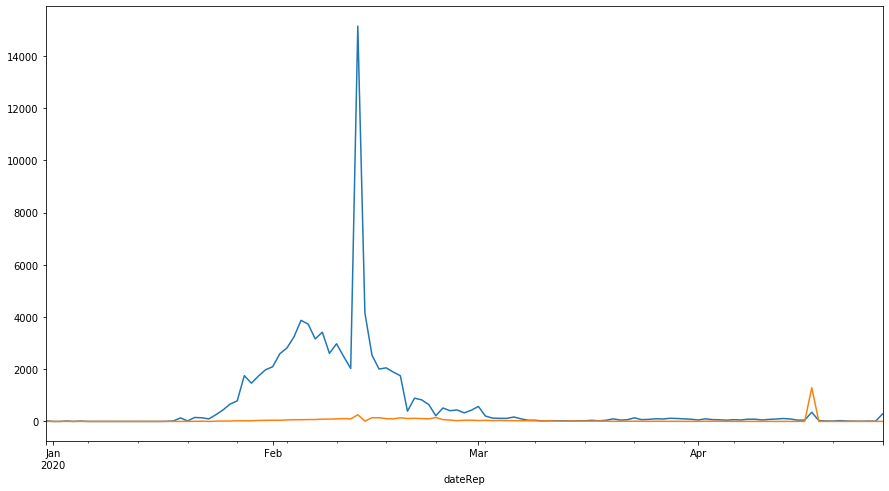

In [8]:
datos.loc[datos['countries'] == 'China', 'cases'].plot()
datos.loc[datos['countries'] == 'China', 'deaths'].plot()

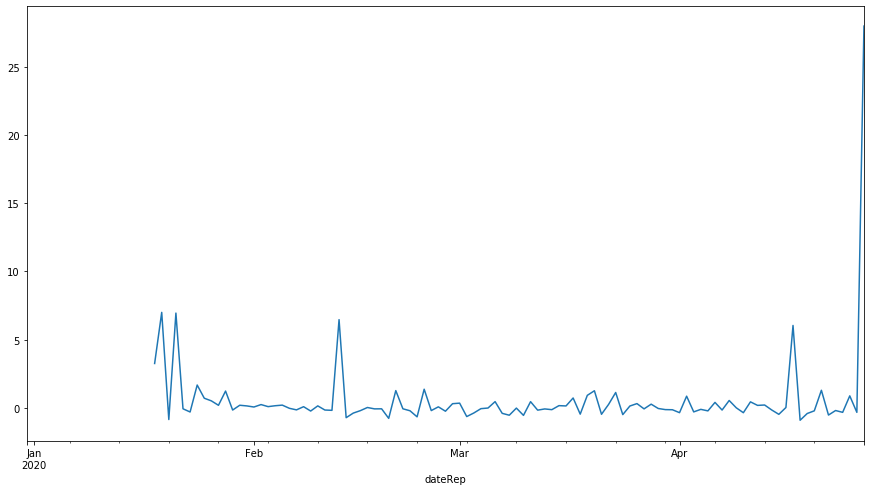

In [9]:
datos.loc[(datos['countries'] == 'China'), 'cases'].pct_change().plot()

Como podemos ver, no tenemos solamente un valor extremo, sino 4. Sin embargo, el que resalta es de febrero, del que pasamos a buscar la fecha, e información sobre este comportamiento anómalo en los medios de comunicación:

In [10]:
datos.loc[(datos['countries'] == 'China') & 
          (datos['month'] == 2), 'cases'].head(20)

dateRep
2020-02-01     2095
2020-02-02     2590
2020-02-03     2812
2020-02-04     3237
2020-02-05     3872
2020-02-06     3727
2020-02-07     3160
2020-02-08     3418
2020-02-09     2607
2020-02-10     2974
2020-02-11     2490
2020-02-12     2028
2020-02-13    15141
2020-02-14     4156
2020-02-15     2538
2020-02-16     2007
2020-02-17     2052
2020-02-18     1890
2020-02-19     1750
2020-02-20      394
Name: cases, dtype: int64

En este caso, el pico no viene precedido de días de infravaloración de los casos, como el extremal encontrado para Italia.

Este evento fue ampliamente reportado en los medios de comunicación en su momento:
    
https://edition.cnn.com/2020/02/13/asia/china-numbers-novel-coronavirus-intl/index.html

https://www.businessinsider.com/china-hubei-province-nearly-15000-new-coronavirus-cases-2020-2?IR=T

https://www.cnbc.com/2020/02/13/coronavirus-latest-updates-china-hubei.html

https://time.com/5783401/covid19-hubei-cases-classification/

*"he jump in new cases—more than 14,800 in the province at the epicenter of the outbreak—is due to a change in the criteria for counting diagnoses of the virus. Observers say this could be a step in the right direction and lead to a better picture of the situation in the province at the epicenter of the outbreak. However, concerns remain about the transparency of the data from Chinese authorities."*

*"Previously, only patients that had received positive results from a laboratory test were included in the publicly reported case count. Confirmed cases will now be based on clinical diagnosis, including the use of CT scans. These were previously only counted as “probable” infections. That means that doctors will have more discretion to give patients an immediate diagnosis, instead of waiting for the results of a laboratory test.*"

https://www.bloomberg.com/news/articles/2020-02-13/china-coronavirus-cases-jump-after-counting-method-revision

*"The change will raise the number of those infected globally by a third to almost 60,000, dashing hope that the epidemic was showing signs of easing."*

*"In a statement on Thursday morning, the Hubei national health commission said it would now start including cases confirmed by “clinical diagnosis,” which refers to using CT imaging scans to diagnose patients, alongside those confirmed by the previous method of nucleic acid testing kits."*

*"Previously, many patients with pneumonia-like symptoms found via CT scans could not be diagnosed as positive without an additional nucleic acid test.*"

Lo lógico sería repartir todos estos nuevos casos entre, al menos, los 10 días anteriores, proporcionalmente al valor que tuviesen esos días.

Sin embargo, no parece ser la práctica común de las curvas trazadas en los distintos medios, y una modificación tan grande nos alejaría de otros análisis que no hayan hecho dichas modificaciones, por lo que mantendremos el valor, a diferencia de lo hecho en el caso de Italia.

Finalmente, como podemos ver, el pct_change sería un buen método para encontrar valores extremos:

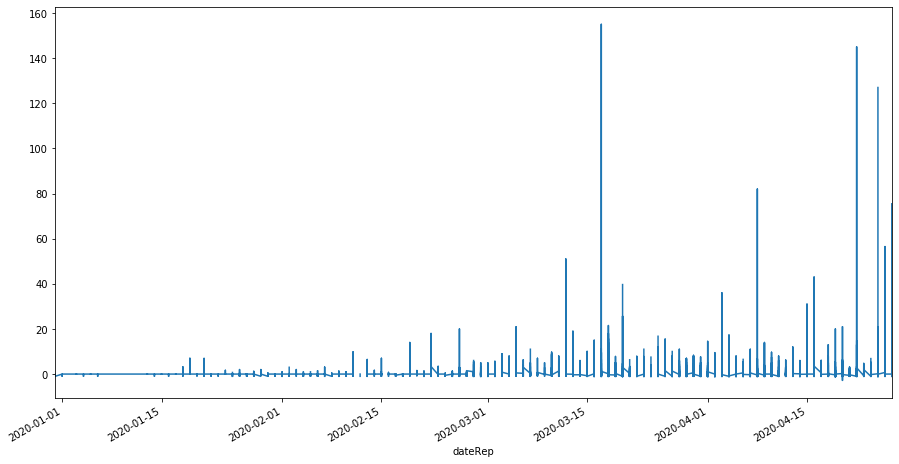

In [11]:
datos.loc[:, 'cases'].pct_change().fillna(0).plot()

Y... aquí tenemos los outliers:

In [12]:
datos['%ch_c'] = datos.loc[:, 'cases'].pct_change().fillna(0)
datos['%ch_c'].replace(np.inf, 0, inplace = True)

datos['cases_yest'] = datos['cases'].shift().fillna(0).astype(int)

outliers = datos[(datos['cases'] > 100) & (datos['%ch_c'] > 3)].sort_values('%ch_c', ascending = False)
outliers

,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,continentExp,%ch_c,cases_yest
dateRep,,,,,,,,,,,,
2020-03-17,17,3,2020,156,0,Pakistan,PK,PAK,2.122150e+08,Asia,155.000000,1
2020-04-22,22,4,2020,146,0,Cameroon,CM,CMR,2.521624e+07,Africa,145.000000,1
2020-04-25,25,4,2020,128,0,Equatorial_Guinea,GQ,GNQ,1.308974e+06,Africa,127.000000,1
2020-04-08,8,4,2020,249,7,Egypt,EG,EGY,9.842360e+07,Africa,82.000000,3
2020-04-27,27,4,2020,153,0,Palestine,PS,PSE,4.569087e+06,Asia,75.500000,2
2020-04-26,26,4,2020,115,4,Cameroon,CM,CMR,2.521624e+07,Africa,56.500000,2
2020-03-20,20,3,2020,244,0,Israel,IL,ISR,8.883800e+06,Asia,39.666667,6
2020-03-12,12,3,2020,238,0,Qatar,QA,QAT,2.781677e+06,Asia,38.666667,6
2020-04-27,27,4,2020,290,3,China,CN,CHN,1.392730e+09,Asia,28.000000,10


Podemos hacer ahora lo mismo con las muertes:

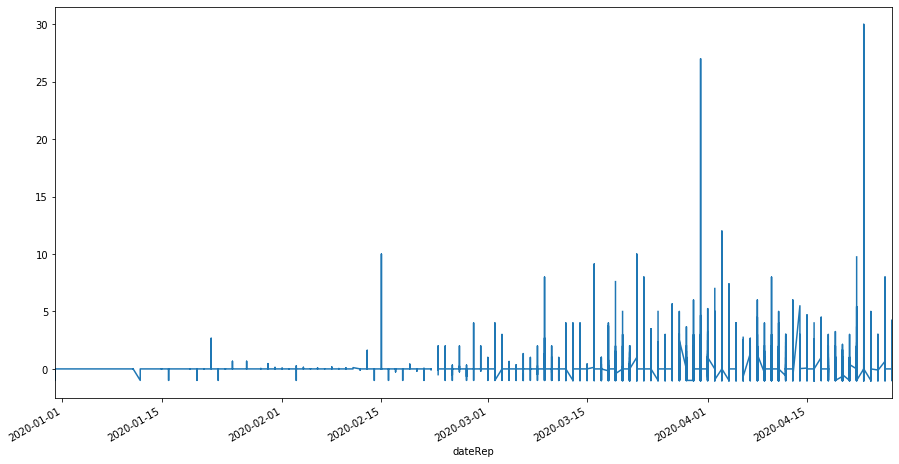

In [13]:
datos.loc[:, 'deaths'].pct_change().fillna(0).plot()

In [14]:
datos['%ch_d'] = datos.loc[:, 'deaths'].pct_change().fillna(0)
datos['%ch_d'].replace(np.inf, 0, inplace = True)

In [15]:
datos['deaths_yest'] = datos['deaths'].shift().fillna(0)

outliers.append(datos[(datos['deaths'] > 100) & (datos['%ch_d'] > 3)]) 
outliers

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,continentExp,%ch_c,cases_yest
dateRep,,,,,,,,,,,,
2020-03-17,17,3,2020,156,0,Pakistan,PK,PAK,2.122150e+08,Asia,155.000000,1
2020-04-22,22,4,2020,146,0,Cameroon,CM,CMR,2.521624e+07,Africa,145.000000,1
2020-04-25,25,4,2020,128,0,Equatorial_Guinea,GQ,GNQ,1.308974e+06,Africa,127.000000,1
2020-04-08,8,4,2020,249,7,Egypt,EG,EGY,9.842360e+07,Africa,82.000000,3
2020-04-27,27,4,2020,153,0,Palestine,PS,PSE,4.569087e+06,Asia,75.500000,2
2020-04-26,26,4,2020,115,4,Cameroon,CM,CMR,2.521624e+07,Africa,56.500000,2
2020-03-20,20,3,2020,244,0,Israel,IL,ISR,8.883800e+06,Asia,39.666667,6
2020-03-12,12,3,2020,238,0,Qatar,QA,QAT,2.781677e+06,Asia,38.666667,6
2020-04-27,27,4,2020,290,3,China,CN,CHN,1.392730e+09,Asia,28.000000,10


Vamos ahora a calculas los casos totales y representarlos:

In [16]:
datos[['tot_cases','tot_deaths']] = datos.groupby('countries')[['cases','deaths']].cumsum()

In [17]:
datos['deaths/cases'] = datos['tot_deaths']/datos['tot_cases'].fillna(0)

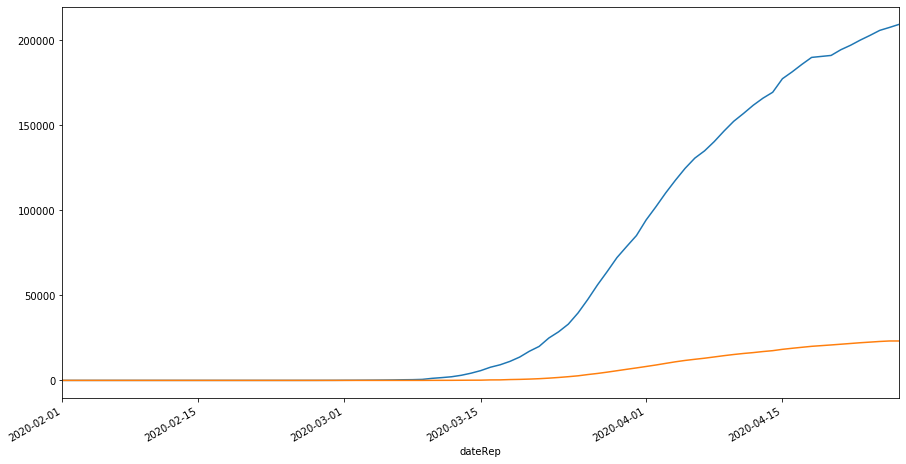

In [18]:
datos.loc[(datos['countries'] == 'Spain') & (datos['cases']>0), 'tot_cases'].plot()
datos.loc[(datos['countries'] == 'Spain') & (datos['cases']>0), 'tot_deaths'].plot()

Y calculamos también los logartimos de las series de los casos y muertes diarias, y los casos y muertes totales:

In [19]:
datos[['ln_cases', 'ln_deaths', 'ln_tot_cases','ln_tot_deaths']] = datos[['cases','deaths', 'tot_cases', 'tot_deaths']].applymap(lambda x: np.log(x) if x > 0 else 0)

También de los % de variación de las distintas series:

In [20]:
datos[['%_chg_cases', '%_chg_deaths', '%_chg_tot_cases','%_chg_tot_deaths']] = datos[['cases','deaths', 'tot_cases', 'tot_deaths']].pct_change().fillna(0)
datos[['%_chg_cases', '%_chg_deaths', '%_chg_tot_cases','%_chg_tot_deaths']].replace(np.inf, 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Comprobamos si la fecha fin de los datos para todos los países es la misma:

In [21]:
last_day_country_data = list()

for country in datos['countries'].unique():
    
    df_temp = datos.reset_index()[datos.reset_index()['countries'] == country]
    series = df_temp.loc[df_temp['dateRep'] == df_temp['dateRep'].max(), 'dateRep']
    value = series[series.index[0]]
    last_day_country_data.append(value)

In [22]:
np.unique(last_day_country_data)

array([Timestamp('2020-03-10 00:00:00'), Timestamp('2020-04-27 00:00:00')],
      dtype=object)

Vemos que no, por lo que tenemos que tener en cuenta que la fecha fin de casa país es distinta.

In [23]:
# Para estudios preliminares consideraremos que el primer día de inicio de la enfermedad en un país es el
# primer día en el que se superan los 30 casos:

days_into_sickness = datos.index.max() - datos[datos['tot_cases'] > 30].reset_index().groupby('countries')[['dateRep']].min()

days_into_sickness.reset_index(inplace = True)

days_into_sickness.columns = ['countries', 'days_into_sickness']
days_into_sickness['days_into_sickness'] = days_into_sickness['days_into_sickness'].apply(lambda x: x.days)

for_index = datos[datos['tot_cases'] > 30].reset_index().groupby('countries')[['dateRep']].min()

days_into_sickness.index = list(for_index['dateRep'])

In [24]:
for_days_into_sickness = pd.merge(datos, days_into_sickness, how = 'left', on='countries')['days_into_sickness']
for_days_into_sickness.index = datos.index
datos['days_into_sickness'] = for_days_into_sickness

In [25]:
starting_date = datos[datos['tot_cases'] > 30].reset_index().groupby('countries')[['dateRep']].min()

dict_starting_date = dict(zip(starting_date.index, starting_date['dateRep']))

In [26]:
def starting_date_per_country(country):
    
    global dict_starting_date
    global datos
    
    if country in dict_starting_date: 
        return dict_starting_date[country]
    
    else:
        return datos.index.max()

In [27]:
datos['starting_date'] = datos['countries'].apply(starting_date_per_country)

In [28]:
datos['day_of_evol'] = (datos.index - datos['starting_date'])
datos['day_of_evol'] = datos['day_of_evol'].apply(lambda x: x.days if x.days > 0 else 0)

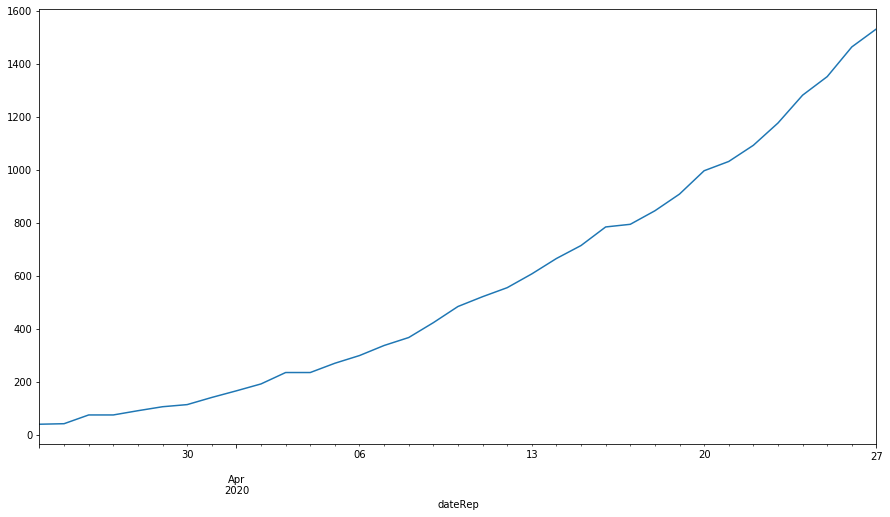

In [29]:
datos.loc[(datos['day_of_evol'] > 0) & (datos['countries'] == 'Afghanistan'), 'tot_cases'].plot()

In [30]:
datos['cases'] = datos['cases'].astype('int')
datos['tot_cases'] = datos['tot_cases'].astype('int')
datos['tot_deaths'] = datos['tot_deaths'].astype('int')
datos['deaths/cases'] = datos['deaths/cases'].fillna(0)

In [31]:
datos.replace(np.inf, 0, inplace = True)

In [32]:
agregados = datos.groupby(['countries'])[['cases', 'deaths', 'popData2018']].agg(['sum', 'first'])
agregados = pd.DataFrame(zip(agregados['cases']['sum'], agregados['deaths']['sum'], agregados['popData2018']['first']), 
                         columns =['cases', 'deaths', 'popData2018'], 
                         index =agregados.index)

agregados['death_rate'] = agregados['deaths'] / agregados['cases']
agregados ['deaths_per_pop'] = agregados['deaths'] / agregados['popData2018']
agregados[agregados['cases'] > 10000].sort_values('death_rate', ascending = False)

,cases,deaths,popData2018,death_rate,deaths_per_pop
countries,,,,,
France,124575,22856,6.698724e+07,0.183472,3.411993e-04
Belgium,46134,7094,1.142207e+07,0.153769,6.210784e-04
United_Kingdom,152840,20732,6.648899e+07,0.135645,3.118110e-04
Italy,197675,26644,6.043128e+07,0.134787,4.408975e-04
Netherlands,37845,4475,1.723102e+07,0.118245,2.597061e-04
Sweden,18640,2194,1.018318e+07,0.117704,2.154534e-04
Spain,209465,23190,4.672375e+07,0.110711,4.963215e-04
Mexico,14677,1351,1.261908e+08,0.092049,1.070601e-05
Brazil,61888,4205,2.094693e+08,0.067945,2.007454e-05


In [33]:
agregados[agregados['cases'] > 10000].sort_values('deaths_per_pop', ascending = False)

,cases,deaths,popData2018,death_rate,deaths_per_pop
countries,,,,,
Belgium,46134,7094,1.142207e+07,0.153769,6.210784e-04
Spain,209465,23190,4.672375e+07,0.110711,4.963215e-04
Italy,197675,26644,6.043128e+07,0.134787,4.408975e-04
France,124575,22856,6.698724e+07,0.183472,3.411993e-04
United_Kingdom,152840,20732,6.648899e+07,0.135645,3.118110e-04
Netherlands,37845,4475,1.723102e+07,0.118245,2.597061e-04
Ireland,19262,1087,4.853506e+06,0.056432,2.239618e-04
Sweden,18640,2194,1.018318e+07,0.117704,2.154534e-04
United_States_of_America,965910,54876,3.271674e+08,0.056813,1.677306e-04


In [34]:
datos.to_csv('../Datos/coronavirus_tratado.csv', sep = sep, encoding = 'UTF-8')
outliers.to_csv('../Datos/coronavirus_anomalias.csv', sep = sep, encoding = 'UTF-8')
agregados.to_csv('../Datos/coronavirus_agregados.csv', sep = sep, encoding = 'UTF-8')